In [37]:
%pylab inline
plt.rcParams["figure.figsize"] = [20,10]

Populating the interactive namespace from numpy and matplotlib


In [38]:
# This cell makes sure that you have all the necessary libraries installed
import sys
import platform
from importlib.util import find_spec, module_from_spec
import numpy as np
import matplotlib.pyplot as plt

## Part 2: Bayesian Linear (Polynomial) Regression

### Sine 2 

First a function to generate periodic data is created. 

The method has a parameter $N$ and returns $N$-dimensional vectors $x$ and $t$, where the $x$ values drawn from a uniform distribution between $0$ and $2 \pi$ and the elements $t_i$ of $t$ are distributed according to:

$$t_i \sim \mathcal{N}(\mu_i, \sigma^2)$$

where $x_i$ is the $i$-th elements of $f{x}$, the mean $\mu_i = \sin(x_i)$ and the standard deviation $\sigma = 0.25$.

In this notebook a Bayesian linear regression model is implementend and fit to the periodic data. The regression model has a zero-mean isotropic Gaussian prior over the parameters, governed by a single (scalar) precision parameter $\alpha$, i.e.:

$$p(w \;|\; \alpha) = \mathcal{N}(w \;|\; 0, \alpha^{-1} I)$$

The covariance and mean of the posterior are given by:

$$S_N= \left( \alpha I + \beta Phi^T Phi \right)^{-1} $$
$$m_N = \beta\; S_N Phi^T t$$

where $\alpha$ is the precision of the predictive distribution, and $\beta$ is the noise precision. 


In [39]:
def gen_sine2(n):    
    x = np.random.uniform(0, 2*pi, n)
    t = np.random.normal(np.sin(x), 0.25)
    return x, t


### Compute Posterior

The method `fit_polynomial_bayes(x, t, M, alpha, beta)` is created, that returns the mean $m_N$ and covariance $S_N$ of the posterior for a $M$-th order polynomial. 

In [40]:
def fit_polynomial_bayes(x, t, M, alpha, beta):
    Phi = np.array([x**i for i in range(M+1)]).T
    S = np.linalg.inv(alpha*np.identity(M+1) + beta*Phi.T@Phi)
    m = beta*S@Phi.T@t    
    return m, S, Phi


### Prediction

The predictive distribution of Bayesian linear regression is:

$$ p(t \;|\; x, t, \alpha, \beta) = \mathcal{N}(t \;|\; m_N^T \phi(x), \sigma_N^2(x))$$

$$ \sigma_N^2 = \frac{1}{\beta} + \phi(x)^T S_N \phi(x) $$

where $\phi(x)$ are the computed features for a new datapoint $x$, and $t$ is the predicted variable for datapoint $x$. 

Using this, the function `predict_polynomial_bayes(x, m, S, beta)` is created, that returns the predictive mean, variance and design matrix $Phi$ given a new datapoint `x`, posterior mean `m`, posterior variance `S` and a choice of model variance `beta`.

In [41]:
def predict_polynomial_bayes(x, m, S, beta):
    comp_feat = np.array([x**i for i in range(M+1)])
    Phi = comp_feat.T
    mean = m.T@comp_feat   
    sigma = (1/beta + comp_feat.T@S@comp_feat).diagonal() 
    return mean, sigma, Phi


### Plot predictive distribution

The above created function are implemented on 10 datapoints generated with `gen_sine2(10)`. The posterior mean and covariance for a Bayesian polynomial regression model with $M=4$, $\alpha=\frac{2}{5}$ and $\beta=\frac{1}{0.25^2}$ are computed.

To visualize the result, the Bayesion predictive distribution is plotted, where (for $x$ between 0 and $2 \pi$) $t$'s predictive mean and the predictive standard deviation are shown. The datapoints are also included.

The figure shows that the predictive mean seems to fit the data well. Additionally, it shows that the standard deviation is larger when there are no observed data points close by.

Text(0.5, 1.0, 'Bayesian Predictive Distribution')

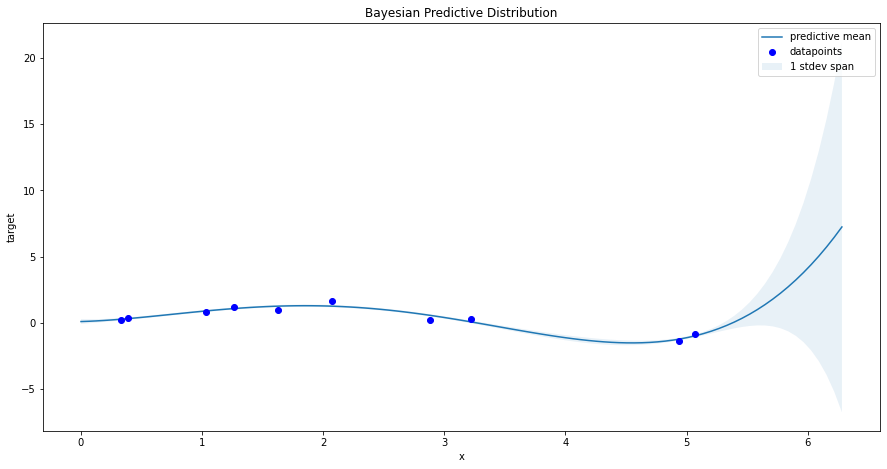

In [42]:
M = 4
alpha = 2/5
beta = 1/(0.25**2)

x, t = gen_sine2(10)
m, S, Phi = fit_polynomial_bayes(x, t, M, alpha, beta)

X = np.linspace(0, 2*pi, 100)
mean, sigma, Phi = predict_polynomial_bayes(X, m, S, beta)

plt.figure(figsize=[15,7.5], edgecolor='black')
plt.plot(X, mean, label='predictive mean')
plt.fill_between(X, mean+sigma, mean-sigma, alpha=0.1, label='1 stdev span')
plt.plot(x, t, 'bo', label='datapoints')
plt.legend()
plt.xlabel('x')
plt.ylabel('target')
plt.title('Bayesian Predictive Distribution')


Finally, a set of samples from the parameters' posterior distribuition is drawn, where each of these samples is a certain choice of parameters for 4-th order polynomial regression. This visualized its performance after a set of 10 datapoints is observed.


Text(0.5, 1.0, '4-th order polynomials with coefficients drawn from posterior distribution')

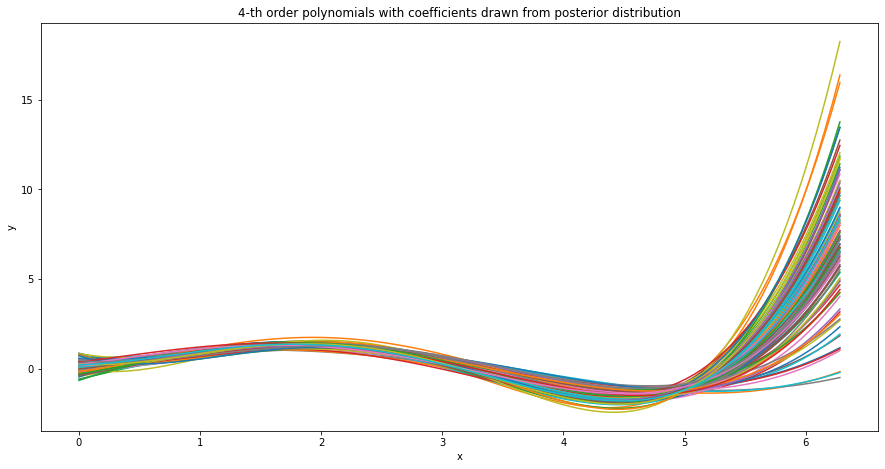

In [43]:
#Posterior distribution is normally distributed
w = np.random.multivariate_normal(m,S,100)
X = np.linspace(0, 2*pi, 100)

plt.figure(figsize=[15,7.5], edgecolor='black')

for i in range(w.shape[0]):
    beta = w[i,:]
    beta_f = np.flip(beta, 0) 
    poly = np.poly1d(beta_f)
    y = poly(X)
    plt.plot(X,y)

plt.xlabel('x')
plt.ylabel('y')
plt.title('4-th order polynomials with coefficients drawn from posterior distribution')
        
